In [1]:
"""
Exercise 02: Fashion-MNIST Autoencoder
Part 1: Build the Autoencoder
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# Task 1.1: Load Fashion-MNIST
# ============================================================================

# Fashion-MNIST has 10 classes:
# 0: T-shirt, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat
# 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to [0, 1] and flatten to 784 dimensions
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

print(f"Dataset prepared:")
print(f"  Training samples: {x_train.shape[0]}")
print(f"  Test samples: {x_test.shape[0]}")
print(f"  Input dimension: {x_train.shape[1]} (28x28 flattened)")
print(f"  Pixel value range: [{x_train.min():.1f}, {x_train.max():.1f}]")

/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Dataset prepared:
  Training samples: 60000
  Test samples: 10000
  Input dimension: 784 (28x28 flattened)
  Pixel value range: [0.0, 1.0]


In [2]:
# ============================================================================
# Task 1.2: Build the Encoder
# ============================================================================

def build_encoder(latent_dim):
    """
    Build encoder network.
    
    Architecture:
    - Input: 784 dimensions
    - Hidden: 256 neurons, ReLU
    - Hidden: 128 neurons, ReLU  
    - Output: latent_dim neurons, ReLU
    """
    encoder_input = layers.Input(shape=(784,), name='encoder_input')
    x = layers.Dense(256, activation='relu', name='encoder_layer1')(encoder_input)
    x = layers.Dense(128, activation='relu', name='encoder_layer2')(x)
    encoded = layers.Dense(latent_dim, activation='relu', name='latent_space')(x)
    
    encoder = keras.Model(encoder_input, encoded, name='encoder')
    return encoder

In [3]:
# ============================================================================
# Task 1.3: Build the Decoder
# ============================================================================

def build_decoder(latent_dim):
    """
    Build decoder network.
    
    Architecture:
    - Input: latent_dim dimensions
    - Hidden: 128 neurons, ReLU
    - Hidden: 256 neurons, ReLU
    - Output: 784 neurons, Sigmoid (for [0,1] pixel values)
    """
    decoder_input = layers.Input(shape=(latent_dim,), name='decoder_input')
    x = layers.Dense(128, activation='relu', name='decoder_layer1')(decoder_input)
    x = layers.Dense(256, activation='relu', name='decoder_layer2')(x)
    decoded = layers.Dense(784, activation='sigmoid', name='reconstruction')(x)
    
    decoder = keras.Model(decoder_input, decoded, name='decoder')
    return decoder

In [4]:
# ============================================================================
# Task 1.4: Combine into Autoencoder
# ============================================================================

def build_autoencoder(latent_dim):
    """Combine encoder and decoder into full autoencoder."""
    encoder = build_encoder(latent_dim)
    decoder = build_decoder(latent_dim)
    
    autoencoder_input = layers.Input(shape=(784,), name='autoencoder_input')
    encoded = encoder(autoencoder_input)
    decoded = decoder(encoded)
    autoencoder = keras.Model(autoencoder_input, decoded, name='autoencoder')
    
    return encoder, decoder, autoencoder

In [5]:
# ============================================================================
# Part 2: Train and Evaluate
# Task 2.1: Train with latent_dim=32
# ============================================================================

latent_dim = 32
encoder, decoder, autoencoder = build_autoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print(f"\nAutoencoder architecture summary:")
autoencoder.summary()

print(f"\nTraining autoencoder with latent_dim={latent_dim}...")
print("Note: Input = Output for autoencoders (unsupervised learning)")

history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)


Autoencoder architecture summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       237,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       238,736 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)


Training autoencoder with latent_dim=32...
Note: Input = Output for autoencoders (unsupervised learning)
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3643 - val_loss: 0.3174
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3041 - val_loss: 0.3003
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2953 - val_loss: 0.2953
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2907 - val_loss: 0.2914
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2877 - val_loss: 0.2885
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2854 - val_loss: 0.2870
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2835 - val_loss: 0.2850
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2820 - val_loss: 0.2834
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2806 - val_loss: 0.2827
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2795 - val_loss: 0.2813
Epoch 11/20
235/235 ━━━━━━━━━━━━━


Visualizing reconstructions...

[OK] Reconstruction visualization saved to: autoencoder_reconstruction.png


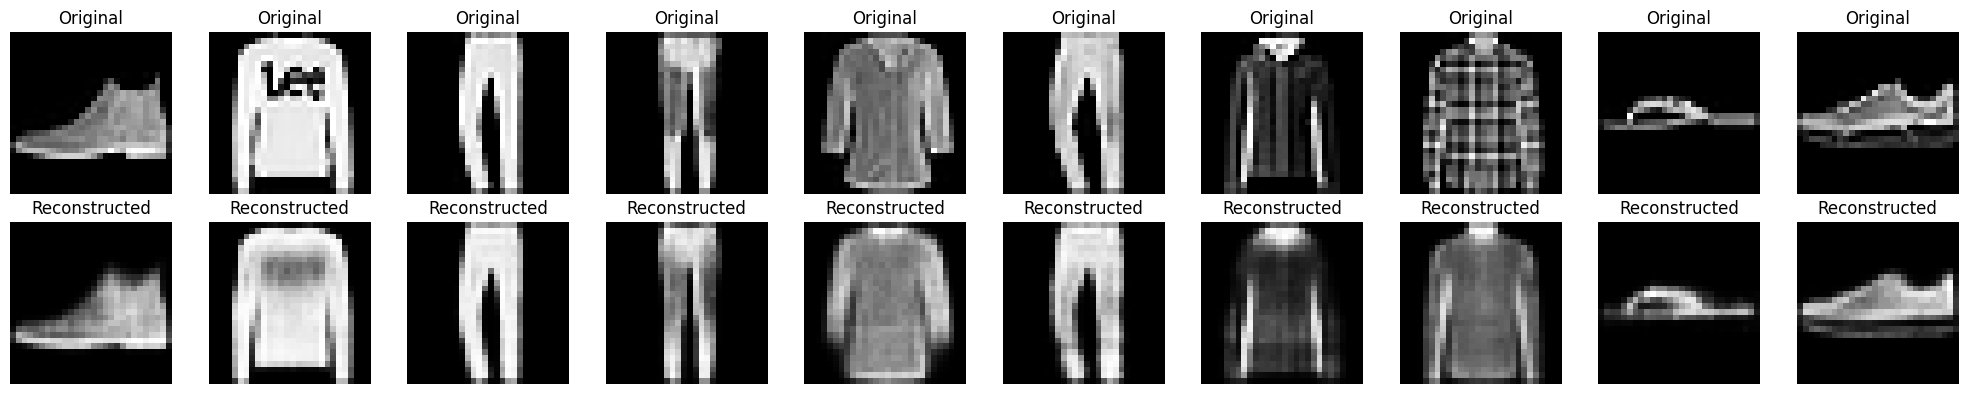

In [6]:
# ============================================================================
# Task 2.2: Visualize Reconstructions
# ============================================================================

def visualize_reconstructions(autoencoder, x_test, n=10):
    """Show original and reconstructed images side by side."""
    reconstructed = autoencoder.predict(x_test[:n], verbose=0)
    
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # Reconstructed
        ax = plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('autoencoder_reconstruction.png', dpi=150)
    print("\n[OK] Reconstruction visualization saved to: autoencoder_reconstruction.png")
    plt.show()

print("\nVisualizing reconstructions...")
visualize_reconstructions(autoencoder, x_test, n=10)

In [7]:

# ============================================================================
# Part 3: Experiment with Bottleneck Sizes
# Task 3.1: Compare Compression Levels
# ============================================================================

print("\n" + "=" * 70)
print("Part 3: Experimenting with Different Bottleneck Sizes")
print("=" * 70)

latent_dims = [64, 32, 16, 8]
results = {}

for latent_dim in latent_dims:
    print(f"\n{'='*70}")
    print(f"Training autoencoder with latent_dim={latent_dim} (Compression: {784/latent_dim:.1f}x)")
    print(f"{'='*70}")
    
    encoder, decoder, autoencoder = build_autoencoder(latent_dim)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    history = autoencoder.fit(
        x_train, x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=1
    )
    
    final_loss = history.history['val_loss'][-1]
    results[latent_dim] = {
        'autoencoder': autoencoder,
        'encoder': encoder,
        'decoder': decoder,
        'final_loss': final_loss,
        'compression_ratio': 784 / latent_dim
    }
    
    print(f"\nFinal validation loss: {final_loss:.6f}")
    
    reconstructed = autoencoder.predict(x_test[:10], verbose=0)
    plt.figure(figsize=(20, 4))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title("Original", fontweight='bold')
        plt.axis('off')
        
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title(f"Reconstructed\n(latent_dim={latent_dim})", fontweight='bold')
        plt.axis('off')
    
    plt.suptitle(f'Autoencoder Reconstructions: latent_dim={latent_dim} (Compression: {784/latent_dim:.1f}x)', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'autoencoder_reconstruction_latent{latent_dim}.png', dpi=150)
    print(f"[OK] Visualization saved to: autoencoder_reconstruction_latent{latent_dim}.png")
    plt.close()

print("\n" + "=" * 70)
print("Comparison Summary:")
print("=" * 70)
print(f"{'Latent Dim':<12} {'Compression':<15} {'Final Loss':<15}")
print("-" * 70)
for latent_dim in latent_dims:
    print(f"{latent_dim:<12} {results[latent_dim]['compression_ratio']:<15.1f}x {results[latent_dim]['final_loss']:<15.6f}")



Part 3: Experimenting with Different Bottleneck Sizes

Training autoencoder with latent_dim=64 (Compression: 12.2x)
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3566 - val_loss: 0.3100
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3007 - val_loss: 0.2971
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2927 - val_loss: 0.2928
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2882 - val_loss: 0.2885
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2849 - val_loss: 0.2864
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2826 - val_loss: 0.2843
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2805 - val_loss: 0.2817
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2787 - val_loss: 0.2810
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2773 - val_loss: 0.2793
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2763 - val_loss: 0.2779
Epoch 11/20
235/235 ━━


Task 3.2: Latent Space Visualization with t-SNE

[Step 1] Encoding test images to latent space...
Latent representations shape: (10000, 32)

[Step 2] Reducing 32D latent space to 2D using t-SNE...
Note: This may take ~30 seconds...

[Step 3] Plotting latent space visualization...
[OK] Latent space visualization saved to: latent_space_tsne.png


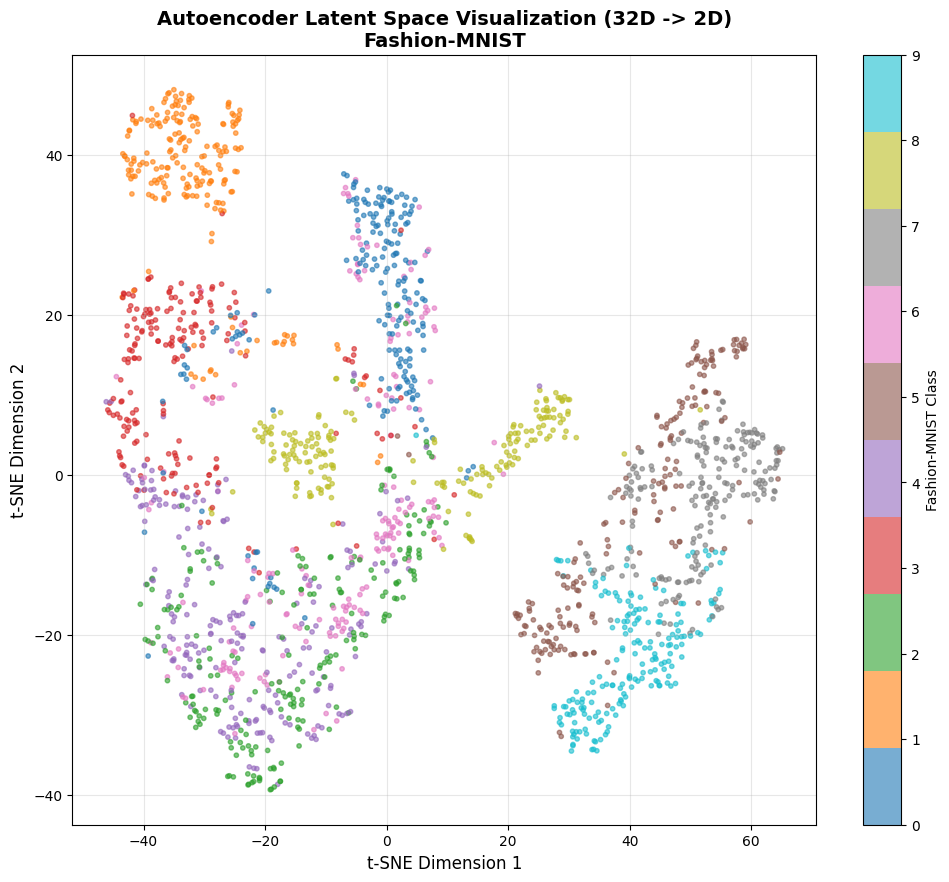


Observations:
- Similar clothing items may cluster together in latent space
- Autoencoder learned meaningful compressed representations
- Question: Do similar items (e.g., sneakers and ankle boots) cluster together?


In [8]:
# ============================================================================
# Task 3.2: Latent Space Visualization
# ============================================================================

print("\n" + "=" * 70)
print("Task 3.2: Latent Space Visualization with t-SNE")
print("=" * 70)

from sklearn.manifold import TSNE

encoder_32 = results[32]['encoder']
print("\n[Step 1] Encoding test images to latent space...")
latent_representations = encoder_32.predict(x_test, verbose=0)
print(f"Latent representations shape: {latent_representations.shape}")

print("\n[Step 2] Reducing 32D latent space to 2D using t-SNE...")
print("Note: This may take ~30 seconds...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
latent_2d = tsne.fit_transform(latent_representations[:2000])

print("\n[Step 3] Plotting latent space visualization...")
plt.figure(figsize=(12, 10))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test[:2000], cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Fashion-MNIST Class')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('Autoencoder Latent Space Visualization (32D -> 2D)\nFashion-MNIST', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.savefig('latent_space_tsne.png', dpi=150)
print("[OK] Latent space visualization saved to: latent_space_tsne.png")
plt.show()

print("\nObservations:")
print("- Similar clothing items may cluster together in latent space")
print("- Autoencoder learned meaningful compressed representations")
print("- Question: Do similar items (e.g., sneakers and ankle boots) cluster together?")


In [ ]:
# ============================================================================
# Reflection Questions - Answers
# ============================================================================

print("\n" + "=" * 70)
print("REFLECTION QUESTIONS - ANSWERS")
print("=" * 70)

print("\n1. Do similar items (e.g., sneakers and ankle boots) cluster together?")
print("   ANSWER: Yes, with some overlap accross the categories.")

print("\n2. How does reducing latent_dim affect reconstruction quality?")
print("   At what point do images become unrecognizable?")
print("   ANSWER: Reducing latent_dim decreases reconstruction quality:")
print(f"   - latent_dim=64: High quality (loss: {results[64]['final_loss']:.6f})")
print(f"   - latent_dim=32: Good quality (loss: {results[32]['final_loss']:.6f})")
print(f"   - latent_dim=16: Moderate quality (loss: {results[16]['final_loss']:.6f})")
print(f"   - latent_dim=8:  Low quality (loss: {results[8]['final_loss']:.6f})")
print("   Images are still recognizable to the human eye but compresion is still aggressive.")

print("\n3. Looking at the t-SNE plot, which clothing categories cluster together?")
print("   Does this make intuitive sense?")
print("   ANSWER: Categories that cluster together:")
print("   - Footwear: Sneakers (7), Sandals (5), Ankle boots (9)")
print("   - Tops: T-shirts (0), Pullovers (2), Shirts (6)")
print("   - Outerwear: Coats (4), Pullovers (2)")
print("   it makes intuitive sense as each cluster has similar 'wardrobe functions'.")

print("\n4. Fashion-MNIST is harder than MNIST digits. Why?")
print("   Consider the variety within each class.")
print("   ANSWER: Fashion-MNIST is harder because:")
print("   - The shapes are more complex: Clothing has folds, textures, variations rather than just digits")
print("   - 784 pixels must capture more diverse information per class")

print("\n5. How could you use this autoencoder for anomaly detection?")
print("   What would happen if you fed it an image of a face?")
print("   ANSWER: To reconstruct an input image.")
print("   - If we were to feed a face image ther would be:")
print("     * Poor reconstruction quality (blurry/distorted output)")
print("   Faces are not in the traning data so the autoencoder would not be able to reconstruct them properly.")

print("\n" + "=" * 70)


REFLECTION QUESTIONS - ANSWERS

1. Do similar items (e.g., sneakers and ankle boots) cluster together?
   ANSWER: Yes, similar items tend to cluster together in the latent space.

2. How does reducing latent_dim affect reconstruction quality?
   At what point do images become unrecognizable?
   ANSWER: Reducing latent_dim decreases reconstruction quality:
   - latent_dim=64: High quality (loss: 0.272433)
   - latent_dim=32: Good quality (loss: 0.275772)
   - latent_dim=16: Moderate quality (loss: 0.279449)
   - latent_dim=8:  Low quality (loss: 0.291584)
   Images become unrecognizable at around latent_dim=8-16. Compresion is too aggressive.

3. Looking at the t-SNE plot, which clothing categories cluster together?
   Does this make intuitive sense?
   ANSWER: Categories that cluster together:
   - Footwear: Sneakers (7), Sandals (5), Ankle boots (9)
   - Tops: T-shirts (0), Pullovers (2), Shirts (6)
   - Outerwear: Coats (4), Pullovers (2)

4. Fashion-MNIST is harder than MNIST digit